In [1]:
import os

import pandas as pd
import numpy as np

import sklearn
import torch

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={"axes.unicode_minus":False},
        style='darkgrid')

## 데이터 다운로드 & 확인

### train data

In [2]:
data_dir = './data/train/'
data_path = os.path.join(data_dir, 'train_ratings.csv')
train_df = pd.read_csv(data_path)

In [3]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("# of unique train users: ", num_train_users)
print ("# of unique train items: ", num_train_items)

# of unique train users:  31360
# of unique train items:  6807


In [5]:
# 약 98% 채워져 있는 데이터로, 매우 dense함.
print(f"Data sparsity ratio: {1 - len(train_df) / (num_train_users * num_train_items):.2F}")

Data sparsity ratio: 0.98


### side info data

In [6]:
year_data_path = os.path.join(data_dir, 'years.tsv')
writer_data_path = os.path.join(data_dir, 'writers.tsv')
title_data_path = os.path.join(data_dir, 'titles.tsv')
genre_data_path = os.path.join(data_dir, 'genres.tsv')
director_data_path = os.path.join(data_dir, 'directors.tsv')

In [7]:
year_data = pd.read_csv(year_data_path, sep='\t')
writer_data = pd.read_csv(writer_data_path, sep='\t')
title_data = pd.read_csv(title_data_path, sep='\t')
genre_data = pd.read_csv(genre_data_path, sep='\t')
director_data = pd.read_csv(director_data_path, sep='\t')

#### year_data

In [8]:
year_data.info()
year_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922


In [9]:
print ("year data shape: ", year_data.shape)
print("# of unique items in year data: ", year_data.item.nunique())
print("# of unique years: ", year_data.year.nunique())
print ("\nStatistics of year data: ")
year_data.year.describe()

year data shape:  (6799, 2)
# of unique items in year data:  6799
# of unique years:  93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

#### writer_data

In [10]:
writer_data.info()
writer_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005


In [11]:
print ("writer data shape: ", writer_data.shape)
print("# of unique items in writer data: ", writer_data.item.nunique())
print("# of unique writers: ", writer_data.writer.nunique())

writer data shape:  (11306, 2)
# of unique items in writer data:  5648
# of unique writers:  2989


#### title_data

In [12]:
title_data.info()
title_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)


In [13]:
print ("title data shape: ", title_data.shape)
print("# of unique items in title data: ", title_data.item.nunique())
print("# of unique titles: ", title_data.title.nunique())

title data shape:  (6807, 2)
# of unique items in title data:  6807
# of unique titles:  6806


#### genre_data

In [14]:
genre_data.info()
genre_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
0,318,Crime
1,318,Drama
2,2571,Action


In [15]:
print ("genre data shape: ", genre_data.shape)
print("# of unique items in genre data: ", genre_data.item.nunique())
print("# of unique genres: ", genre_data.genre.nunique())

genre data shape:  (15933, 2)
# of unique items in genre data:  6807
# of unique genres:  18


#### director_data

In [16]:
director_data.info()
director_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005


In [17]:
print ("director data shape: ", director_data.shape)
print("# of unique items in director data: ", director_data.item.nunique())
print("# of unique directors: ", director_data.director.nunique())

director data shape:  (5905, 2)
# of unique items in director data:  5503
# of unique directors:  1340


### train data + side info data

#### 빈도수가 높은 순 top10을 `active_users_ids`, `popular_movie_ids` 저장

In [18]:
active_user_ids = train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

print ("active user ids: ", active_user_ids)
print ("\npopular movie ids: ", popular_movie_ids)

active user ids:  Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122, 118754], dtype='int64', name='user')

popular movie ids:  Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


#### side info 별 user-item 빈도수 top10 데이터 샘플을 저장

year

In [19]:
year_df = pd.merge(train_df, year_data, on=['item'])
year_id = year_df.value_counts('year').index[:10]

tmp = []
for year in year_id:
  tmp.append(year_df.loc[year_df.year == year])

year_top = pd.concat(tmp)

print ("All unique years: \n", np.sort(year_df.year.unique())) 
print ("\n# of all unique years: ", year_df.year.nunique())
print ("\ntop 10 years: \n", year_id)
print ("\nsample of top 10 user-year data: \n", year_top.sample(5))
print ("\nshape of the data: ", year_top.shape)

All unique years: 
 [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]

# of all unique years:  93

top 10 years: 
 Index([2004, 1999, 2001, 2002, 2006, 2003, 2000, 2005, 1995, 2007], dtype='int64', name='year')

sample of top 10 user-year data: 
            user  item        time  year
3334626   32284  5446  1404104835  2002
527477    55034  5463  1226250950  2002
3002484  123104  4816  1330794652  2001
3563752   97891  6323  1233815396  2003
3497665   43819  5265  1127396752  2002

shape of the data:  (2173226, 4)


In [20]:
year_top.info()
year_top.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 2173226 entries, 28067 to 5150370
Data columns (total 4 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
 3   year    int64
dtypes: int64(4)
memory usage: 82.9 MB


,user,item,time,year
28067,11,7444,1230783123,2004
28068,61,7444,1197066399,2004
28069,279,7444,1328818899,2004


writer

In [21]:
writer_df = pd.merge(train_df, writer_data, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

tmp = []
for writer in writer_id:
  tmp.append(writer_df.loc[writer_df.writer == writer])

writer_top = pd.concat(tmp)

print ("# of all unique writer ids: ", writer_df.writer.nunique())
print ("\ntop 10 writer ids: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

# of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
            user  item        time     writer
5077876  132800  1258  1265857768  nm0000175
7898505   93528  2006  1150305966  nm0744429
1714797   77814  6539  1234356265  nm0254645
6747773   54107   247  1416757522  nm0001392
1503687   78781  3114  1177255400  nm0004056

shape of the data:  (651286, 4)


In [22]:
writer_top.info()
writer_top.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 651286 entries, 539754 to 11275678
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   user    651286 non-null  int64 
 1   item    651286 non-null  int64 
 2   time    651286 non-null  int64 
 3   writer  651286 non-null  object
dtypes: int64(3), object(1)
memory usage: 24.8+ MB


,user,item,time,writer
539754,11,260,1230787560,nm0000184
539755,14,260,1225311540,nm0000184
539756,31,260,1424733433,nm0000184


title

In [23]:
title_df = pd.merge(train_df, title_data, on=['item'])
title_id = title_df.value_counts('title').index[:10]

tmp = []
for title in title_id:
    tmp.append(title_df.loc[title_df.title == title])

title_top = pd.concat(tmp)

print ("# of all unique movie titles: ", title_df['title'].nunique())
print ("\ntop 10 movie titles: \n", title_id)
print ("\nsample of top 10 user-title data: \n", title_top.sample(5))
print ("\nshape of the data: ", title_top.shape)

# of all unique movie titles:  6806

top 10 movie titles: 
 Index(['Matrix, The (1999)', 'Fight Club (1999)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Silence of the Lambs, The (1991)', 'American Beauty (1999)'],
      dtype='object', name='title')

sample of top 10 user-title data: 
           user  item        time  \
567284   13787   318  1391884259   
839924   60530   296  1133014192   
862397   96947   356  1121712271   
1372636  46136  7153  1200246965   
590821   56772  4993  1225268806   

                                                     title  
567284                    Shawshank Redemption, The (1994)  
839924                                 Pulp Fiction (1994)  
862397                                 Forrest Gump (1994)  
1372636  

In [24]:
title_top.info()
title_top.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 173185 entries, 222427 to 122780
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   user    173185 non-null  int64 
 1   item    173185 non-null  int64 
 2   time    173185 non-null  int64 
 3   title   173185 non-null  object
dtypes: int64(3), object(1)
memory usage: 6.6+ MB


,user,item,time,title
222427,11,2571,1230787515,"Matrix, The (1999)"
222428,25,2571,1277963409,"Matrix, The (1999)"
222429,31,2571,1424736532,"Matrix, The (1999)"


director

In [25]:
director_df = pd.merge(train_df, director_data, on=['item'])
director_id = director_df.value_counts('director').index[:10]

tmp = []
for director in director_id:
  tmp.append(director_df.loc[director_df.director == director])

director_top = pd.concat(tmp)

print ("# of all unique director ids: ", director_df.director.nunique())
print ("\ntop 10 director ids: \n", director_id)
print ("\nsample of top 10 user-director data: \n", director_top.sample(5))
print ("\nshape of the data: ", director_top.shape)

# of all unique director ids:  1340

top 10 director ids: 
 Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

sample of top 10 user-director data: 
            user   item        time   director
1016983   21538    608  1148990701  nm0001054
2200953   54861   1089  1363566216  nm0000233
545613   112203    589  1129606005  nm0000116
3599749   14555  48780  1261336322  nm0634240
1172462  126447   3578  1365961428  nm0000631

shape of the data:  (672019, 4)


In [26]:
director_top.info()
director_top.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 672019 entries, 341943 to 5359011
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      672019 non-null  int64 
 1   item      672019 non-null  int64 
 2   time      672019 non-null  int64 
 3   director  672019 non-null  object
dtypes: int64(3), object(1)
memory usage: 25.6+ MB


,user,item,time,director
341943,11,1544,1230787983,nm0000229
341944,58,1544,1144059266,nm0000229
341945,421,1544,1192346253,nm0000229


genre  
앞에서 봤듯이, unique한 genre 수는 18개뿐이므로, 빈도수 높은 genre 따로 저장하지 않고, 바로 merge함

In [27]:
genre_top = pd.merge(train_df, genre_data, on=['item'])

print ("All unique genres: \n", np.sort(genre_top.genre.unique())) 
print ("\n# of all unique genres: ", genre_top.genre.nunique())
print ("\nsample of user-genre data: \n", genre_top.sample(5))
print ("\nshape of the data: ", genre_top.shape)

All unique genres: 
 ['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']

# of all unique genres:  18

sample of user-genre data: 
            user   item        time     genre
7579199   60425     34  1338231151     Drama
13740718  49270   1385  1179721200  Thriller
1437539   85330  27904  1160125447     Drama
639579    70274   2571  1259014446    Action
2740526   35095    593  1219514661    Horror

shape of the data:  (14126324, 4)


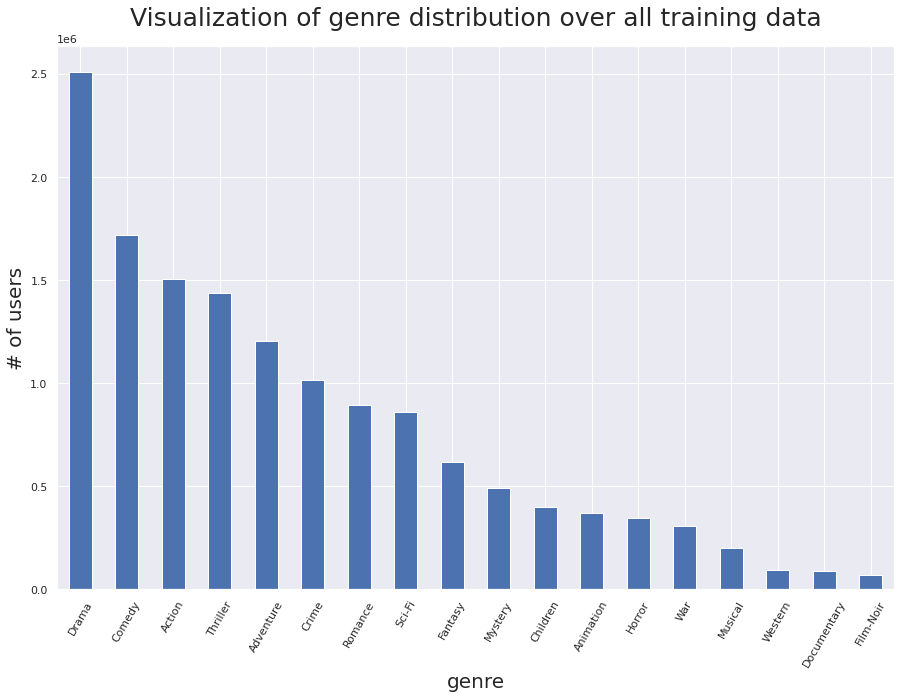

In [28]:
genre_top.genre.value_counts().plot(kind='bar', figsize=(15, 10), rot=60,)
plt.xlabel('genre', size=20)
plt.ylabel('# of users', size=20)
plt.title('Visualization of genre distribution over all training data', size=25, pad=20);

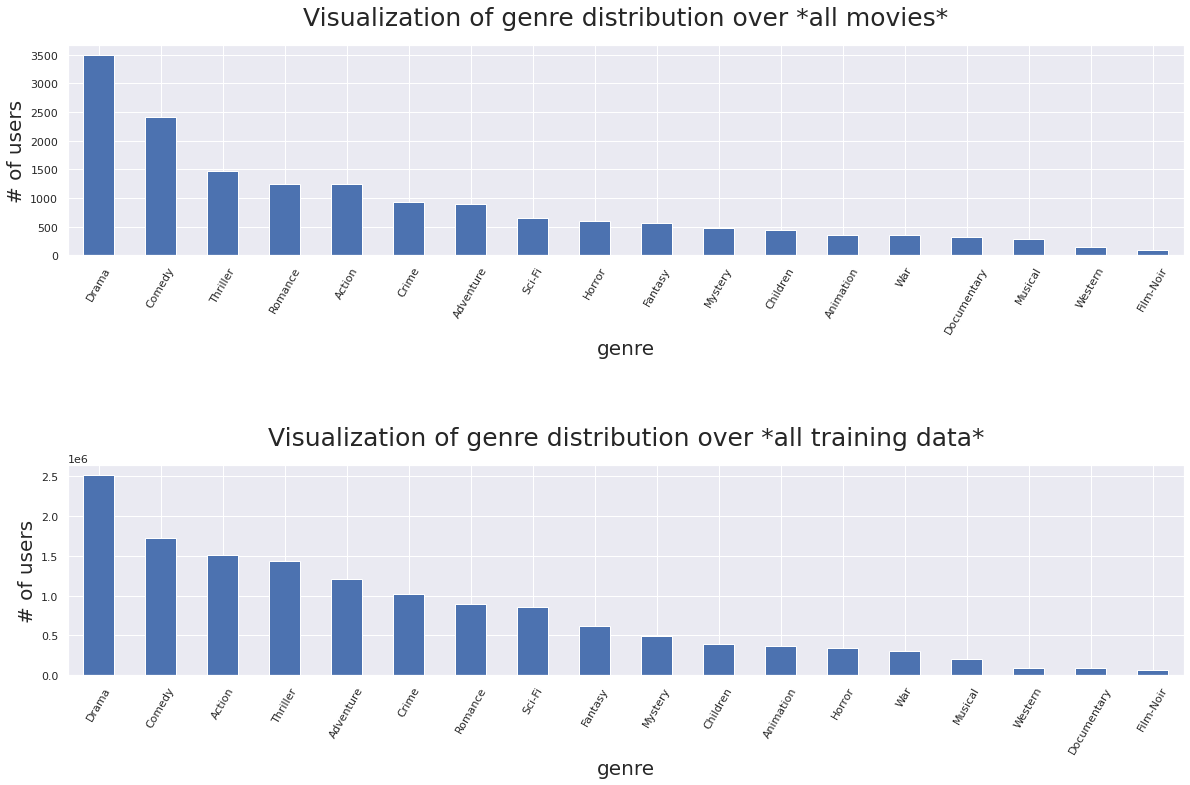

In [29]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
genre_data.genre.value_counts().plot(kind='bar', rot=60)
plt.xlabel('genre', size=20)
plt.ylabel('# of users', size=20)
plt.title('Visualization of genre distribution over *all movies*', size=25, pad=20)

plt.subplot(2,1,2)
genre_top.genre.value_counts().plot(kind='bar', rot=60)
plt.xlabel('genre', size=20)
plt.ylabel('# of users', size=20)
plt.title('Visualization of genre distribution over *all training data*', size=25, pad=20)

plt.subplots_adjust(hspace=1, top=1.0)

- `genre_data` (all movies)
- `genre_top` (all training data)

#### user가 제일 선호하는 장르를 순위별로

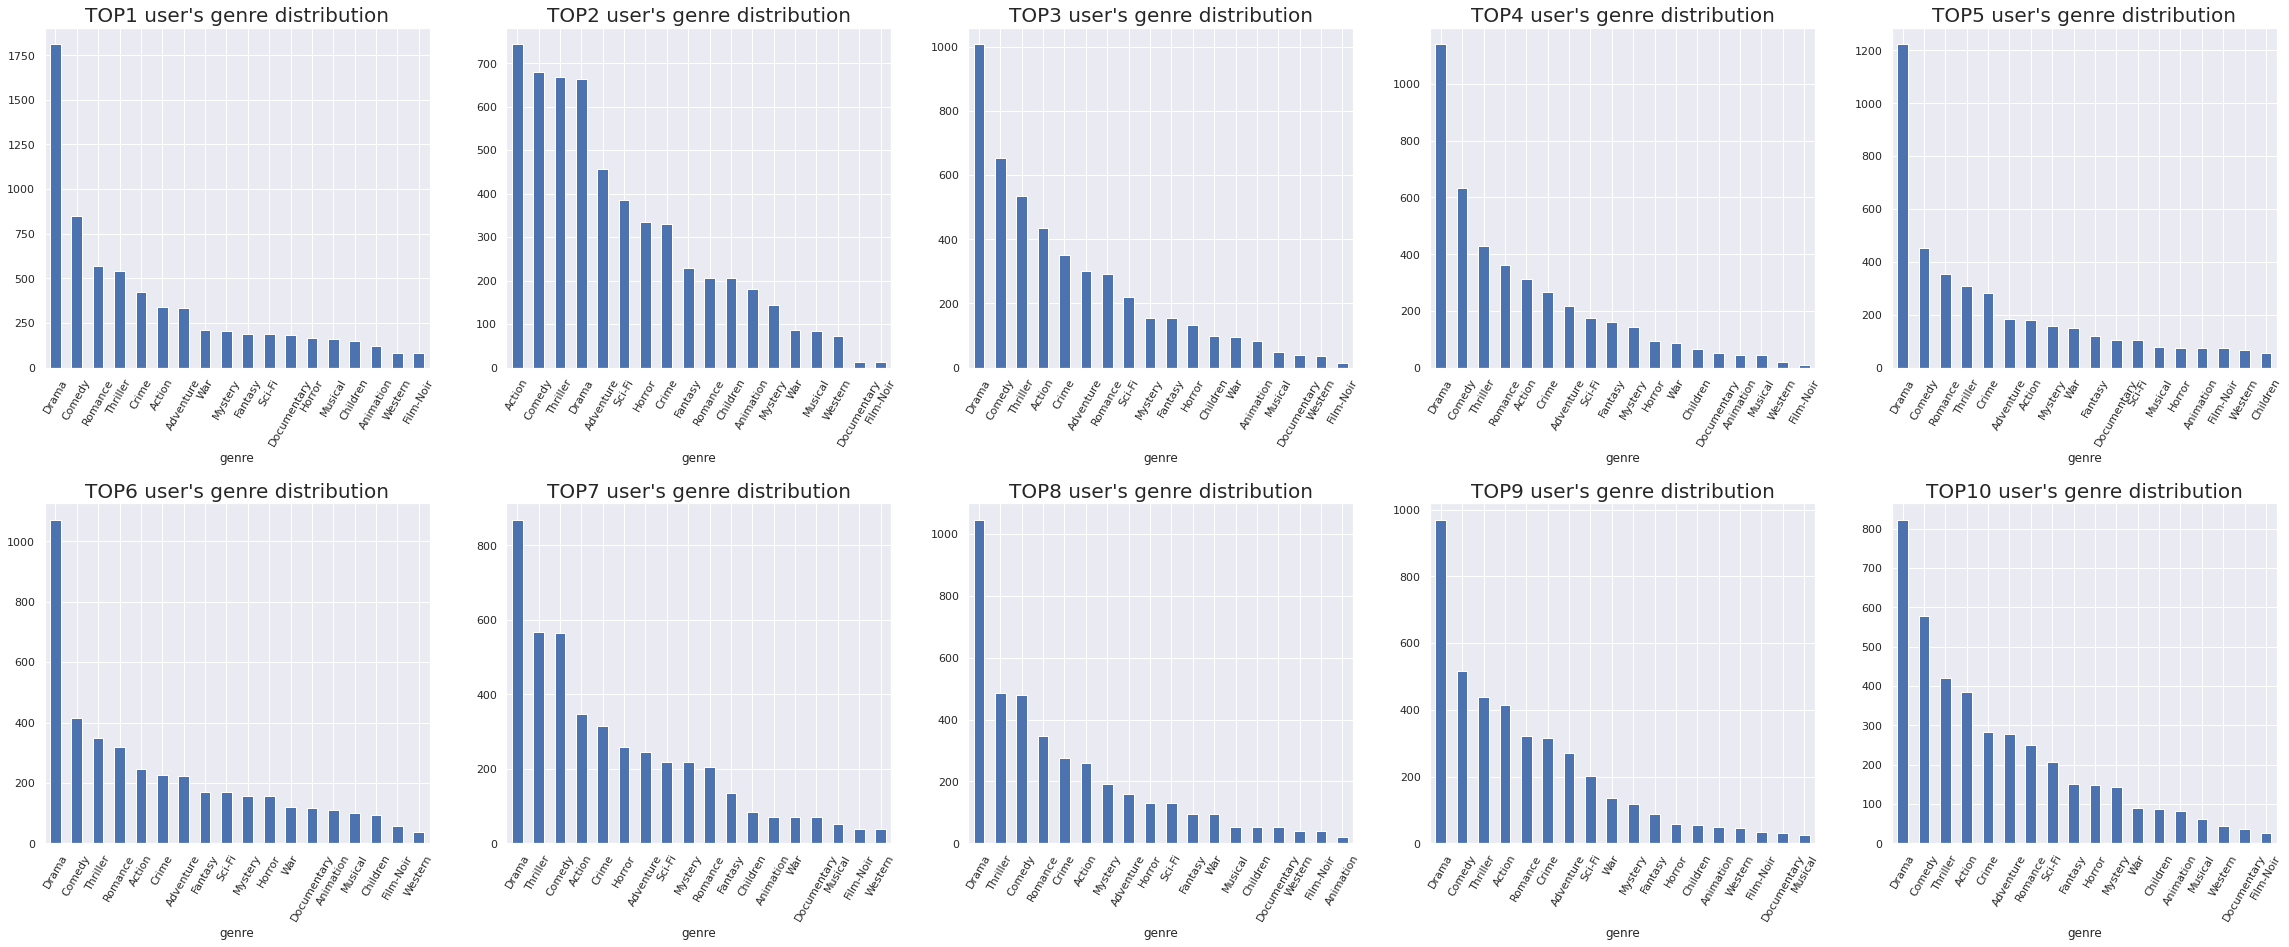

In [30]:
# https://stackoverflow.com/questions/64189469/how-to-resolve-attributeerror-numpy-ndarray-object-has-no-attribute-get-figu
fig, axes = plt.subplots(nrows=2, ncols=5)
plt.subplots_adjust(hspace=0.4)

for (idx, uid), ax in zip(enumerate(active_user_ids), [x for ravel in axes for x in ravel]):
  idx += 1
  genre_user = genre_top.loc[genre_top.user == uid]
  genre_user.genre.value_counts().plot(kind='bar', figsize=(40, 15), rot=60, ax=ax,)
  ax.set_title(f"TOP{idx} user's genre distribution", fontdict={'fontsize': 20})

- 제일 active한 user의 시청영화 장르 분포와 전체 데이터의 장르 분포와 큰 차이 X